In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
# pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 30)

# 데이터분석 스케치

## [Horse colic](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+)

+ team 
  + 권순호, 윤지원, 김원정
  

+ index
	* EDA(Exploratory data analysis)
	* Feature selection
	* Modeling
	* Model selection

## EDA
+ 변수 탐색 및 분류
  + 변수 이름과 설명
  + 상관관계가 없는 변수는 어떤것이 있나?
  + 의미없는값, 전처리가 필요한 값들을 선별및 가공하자

In [3]:
df = pd.read_csv('./horse.csv')
df['outcome'] = df.pop('outcome')

In [4]:
df.tail()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,no,3205,0,0,no,euthanized
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,yes,2208,0,0,yes,euthanized
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,yes,3205,0,0,no,died
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,yes,2208,0,0,yes,lived
298,yes,adult,534618,37.2,40.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,absent,normal,36.0,62.0,clear,1.0,no,6112,0,0,no,euthanized


In [5]:
df.isnull().any().index[df.isnull().any()]

Index(['rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities',
       'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain',
       'peristalsis', 'abdominal_distention', 'nasogastric_tube',
       'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces',
       'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein'],
      dtype='object')

### 변수 이름과 설명 :

surgery?(수술 경험)
  - 1 = Yes, it had surgery
  - 2 = No, It was treated without surgery

count     299
unique      2
top       yes
freq      180
Name: surgery, dtype: object


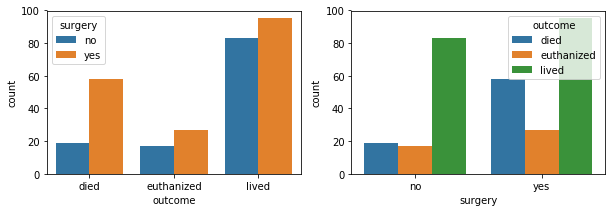

In [6]:
print(df['surgery'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='surgery', data=df)
plt.subplot(1,2,2)
sns.countplot('surgery', hue='outcome', data=df)
plt.show()

In [7]:
df['surgery'].replace({'yes': 1, 'no': 2}, inplace=True)

Age(나이)
- 1 = 성인 말
- 2 = 어린 말 (< 6개월)

count       299
unique        2
top       adult
freq        275
Name: age, dtype: object


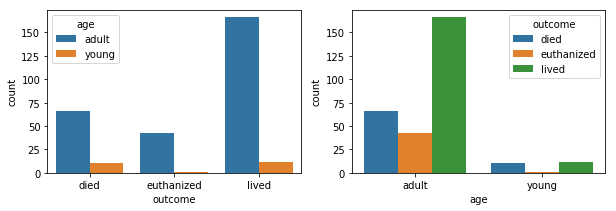

In [8]:
print(df['age'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='age', data=df)
plt.subplot(1,2,2)
sns.countplot('age', hue='outcome', data=df)
plt.show()

In [9]:
df['age'].replace({'adult': 1, 'young': 2}, inplace=True)

Hospital Number(병원 번호)
 - 숫자 ID
 - 말에 지정된 case number
      (만약 말을 1회 이상 치료한다면 특별하지 않을 수 있다.)

In [10]:
len(df['hospital_number'].unique())

283

rectal temperature(직장 온도)
 - linear
 - in degrees celsius.
 - 감염으로 인해 고온이 발생할 수 있습니다.
 - 동물이 late shock을 받으면 온도가 낮아질 수 있다.
 - 정상 온도는 37.8
 - 이 매개 변수는 일반적으로 문제가 진행됨에 따라 변경됩니다. (예를 들어, 말이 충격에 빠질 때 정상 범위를 통과하면서 병변 때문에 상승할 수 있습니다.)
       

In [11]:
df['rectal_temp'].describe()

count    239.000000
mean      38.168619
std        0.733744
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectal_temp, dtype: float64

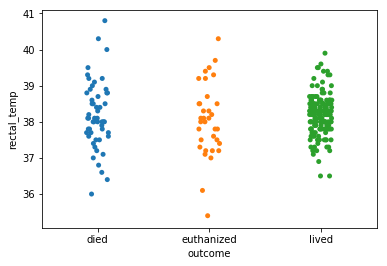

In [12]:
sns.stripplot("outcome", "rectal_temp", data=df, jitter=True)
plt.show()

pulse(맥박)
 - linear
 - 분당 심장 박동 수
 - is a reflection of the heart condition: 30-40은 성인에게 정상입니다.
 - 경주용 말이지만 일반 말보다 심장박동수가 낮다(분당 20-25정도)
 - 통증이있는 병변이 있거나 순환계 충격을 겪은 동물은 심박수가 상승 할 수 있습니다

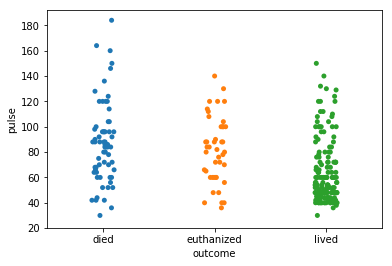

In [13]:
sns.stripplot("outcome", "pulse", data=df, jitter=True)
plt.show()

respiratory rate(호흡 속도)
 - linear
 - normal rate is 8 to 10
 - 심한 변동 때문에 유용성이 의심스럽습니다.

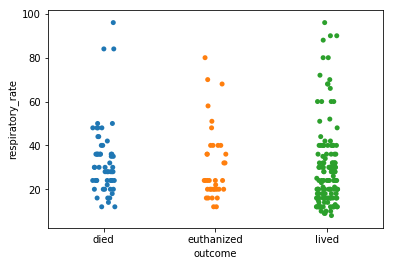

In [14]:
sns.stripplot("outcome", "respiratory_rate", data=df, jitter=True)
plt.show()

temperature of extremities(팔 다리의 온도)
 - 말초 혈액 순환의 주관적 표시
 - possible values:
   - 1 = Normal
   - 2 = Warm
   - 3 = Cool
   - 4 = Cold
 - cool와 cold는 쇼크의 가능성을 보여줍니다.
 - 고열 사지는 직장 온도 상승과 관련이 있습니다.

count      243
unique       4
top       cool
freq       108
Name: temp_of_extremities, dtype: object


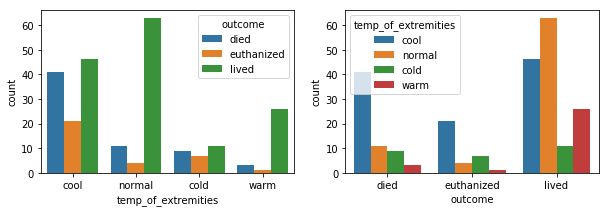

In [15]:
print(df['temp_of_extremities'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('temp_of_extremities', hue='outcome', data=df)
plt.subplot(1,2,2)
sns.countplot('outcome', hue='temp_of_extremities', data=df)
plt.show()

In [16]:
df['temp_of_extremities'].replace({'normal': 1, 'warm': 2, 'cool': 3, 'cold': 4}, inplace=True)

peripheral pulse(말초 맥박)
 - subjective
 - possible values are:
   - 1 = normal
   - 2 = increased
   - 3 = reduced
   - 4 = absent
 - normal or increased p.p.는 적절한 순환을 나타내며 reduced or absent는 나쁜 perfusion을 나타냅니다.

count        230
unique         4
top       normal
freq         114
Name: peripheral_pulse, dtype: object


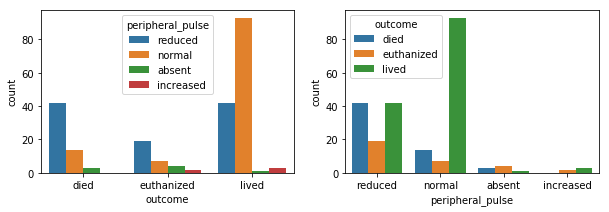

In [17]:
print(df['peripheral_pulse'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='peripheral_pulse', data=df)
plt.subplot(1,2,2)
sns.countplot('peripheral_pulse', hue='outcome', data=df)
plt.show()

In [18]:
df['peripheral_pulse'].replace({'normal': 1, 'increased': 2, 'reduced': 3, 'absent': 4}, inplace=True)

mucous membranes(점막)
 - 주관적인 색의 측정
 - possible values are:
   - 1 = normal pink
   - 2 = bright pink
   - 3 = pale pink
   - 4 = pale cyanotic
   - 5 = bright red / injected
   - 6 = dark cyanotic
 - 1, 2는 정상 또는 약간 증가 된 혈액 순환을 나타냅니다
 - 3 는 early shock 발생일수도 있습니다.
 - 4,6 은 심각한 순환 기관의 손상을 나타낸다.
 - 5는 패혈증을 더 많이 나타낸다.

count             252
unique              6
top       normal_pink
freq               79
Name: mucous_membrane, dtype: object


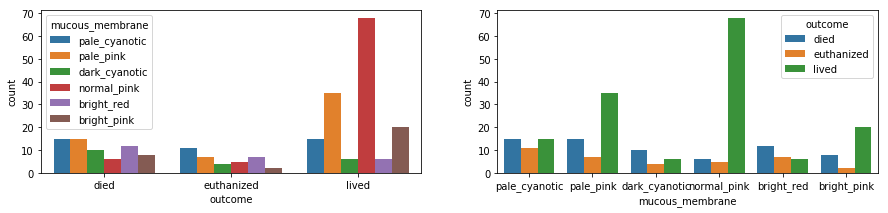

In [19]:
print(df['mucous_membrane'].describe())
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='mucous_membrane', data=df)
plt.subplot(1,2,2)
sns.countplot('mucous_membrane', hue='outcome', data=df)
plt.show()

In [20]:
df['mucous_membrane'].replace({'normal_pink': 1, 'bright_pink': 2, 'pale_pink': 3, 'pale_cyanotic': 4, 'bright_red': 5, 'dark_cyanotic': 6}, inplace=True)

capillary refill time(모세관 주입 시간)
  - 임상 적 판단. 리필 시간이 길수록 혈액 순환이 원활하지 않음.
  - possible values
    - 1 = < 3 seconds
    - 2 = >= 3 seconds

count            267
unique             3
top       less_3_sec
freq             187
Name: capillary_refill_time, dtype: object


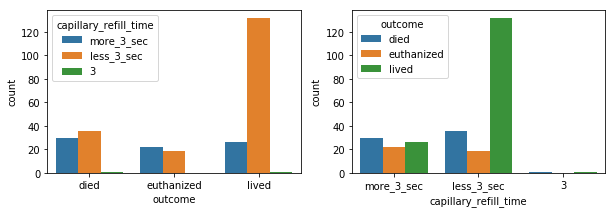

In [21]:
print(df['capillary_refill_time'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='capillary_refill_time', data=df)
plt.subplot(1,2,2)
sns.countplot('capillary_refill_time', hue='outcome', data=df)
plt.show()

In [45]:
df['capillary_refill_time'].replace({'less_3_sec': 1, 'more_3_sec': 2, '3': 2}, inplace=True)

pain 
  - 말의 통증 수준에 대한 주관적인 판단
  - possible values:
    - 1 = alert, no pain
    - 2 = depressed
    - 3 = intermittent mild pain
    - 4 = intermittent severe pain
    - 5 = continuous severe pain
  - should NOT be treated as a ordered or discrete variable!
  - 일반적으로 통증이 심할수록 수술이 필요할 가능성이 높습니다.
  - 통증을 미리 치료하면 통증 수준을 어느 정도 가릴 수 있습니다.

count           244
unique            5
top       mild_pain
freq             67
Name: pain, dtype: object


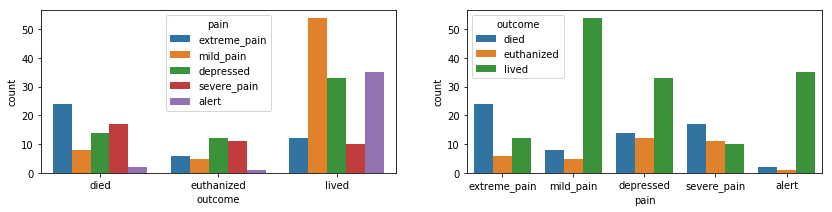

In [46]:
print(df['pain'].describe())
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='pain', data=df)
plt.subplot(1,2,2)
sns.countplot('pain', hue='outcome', data=df)
plt.show()

In [47]:
df['pain'].replace({'alert': 1, 'depressed': 2, 'mild_pain': 3, 'severe_pain': 4, 'extreme_pain': 5}, inplace=True)

peristalsis(연동운동)                        
  - 말의 장내 활동의 표시. 내장이 점점 팽창하거나 말이 더 독성이 생기면서 활동은 감소한다.
  - possible values:
    - 1 = hypermotile
    - 2 = normal
    - 3 = hypomotile
    - 4 = absent

count            255
unique             4
top       hypomotile
freq             127
Name: peristalsis, dtype: object


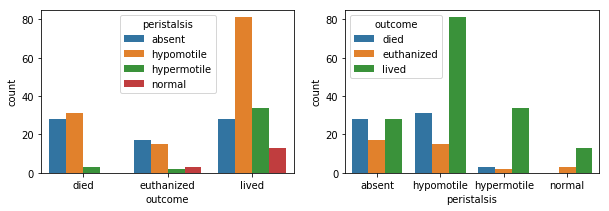

In [23]:
print(df['peristalsis'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='peristalsis', data=df)
plt.subplot(1,2,2)
sns.countplot('peristalsis', hue='outcome', data=df)
plt.show()

In [48]:
df['peristalsis'].replace({'hypermotile': 1, 'normal': 2, 'hypomotile': 3, 'absent': 4}, inplace=True)

abdominal distension(복부 팽창)
  -  An IMPORTANT parameter.
  - possible values
    - 1 = none
    - 2 = slight
    - 3 = moderate
    - 4 = severe
  - 복부 팽만감을 가진 동물은 고통스럽고 내장 운동성을 감소시킬 수 있습니다.
  - 복부 팽창이 심한 말은 단지 압력을 완화시키기 위해 수술이 필요할 것이다.

count      243
unique       4
top       none
freq        75
Name: abdominal_distention, dtype: object


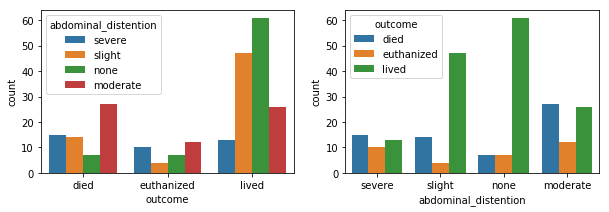

In [24]:
print(df['abdominal_distention'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='abdominal_distention', data=df)
plt.subplot(1,2,2)
sns.countplot('abdominal_distention', hue='outcome', data=df)
plt.show()

In [49]:
df['abdominal_distention'].replace({'none': 1, 'slight': 2, 'moderate': 3, 'severe': 4}, inplace=True)

nasogastric tube(비위 관)
  - 이것은 튜브에서 나오는 가스를 의미합니다.
  - possible values:
    - 1 = none
    - 2 = slight
    - 3 = significant
  - 위에 있는 큰 가스 캡은 말을 불편하게 할 수 있다.

count        195
unique         3
top       slight
freq         101
Name: nasogastric_tube, dtype: object


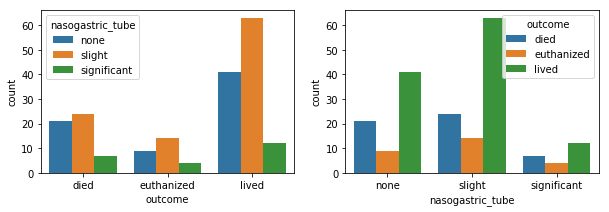

In [25]:
print(df['nasogastric_tube'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='nasogastric_tube', data=df)
plt.subplot(1,2,2)
sns.countplot('nasogastric_tube', hue='outcome', data=df)
plt.show()

In [50]:
df['nasogastric_tube'].replace({'none': 1, 'slight': 2, 'significant': 3}, inplace=True)

nasogastric reflux(비위 역류)
  - possible values
    - 1 = none
    - 2 = > 1 liter
    - 3 = < 1 liter
  - 역류 량이 많을수록 장의 나머지 부분으로부터의 유체 통로에 심각한 장애물이있을 확률이 높습니다

count      193
unique       3
top       none
freq       119
Name: nasogastric_reflux, dtype: object


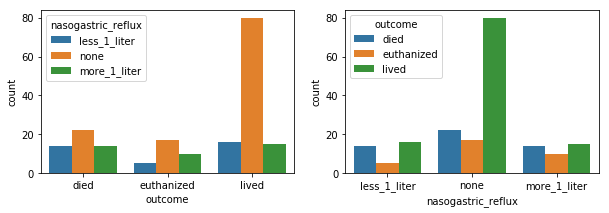

In [26]:
print(df['nasogastric_reflux'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='nasogastric_reflux', data=df)
plt.subplot(1,2,2)
sns.countplot('nasogastric_reflux', hue='outcome', data=df)
plt.show()

In [51]:
df['nasogastric_reflux'].replace({'none': 1, 'more_1_liter': 2, 'less_1_liter': 3}, inplace=True)

nasogastric reflux PH(비위 관성 환류 PH)
  - linear
  - scale is from 0 to 14 with 7 being neutral
  - 정상 값은 3에서 4 범위에 있습니다.

count    53.000000
mean      4.707547
std       1.982311
min       1.000000
25%       3.000000
50%       5.000000
75%       6.500000
max       7.500000
Name: nasogastric_reflux_ph, dtype: float64


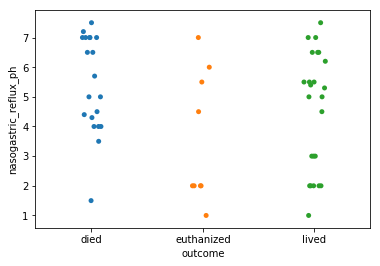

In [27]:
print(df['nasogastric_reflux_ph'].describe())
sns.stripplot("outcome", "nasogastric_reflux_ph", data=df, jitter=True)
plt.show()

rectal examination - feces(직장 검사 - 대변)
  - possible values
    - 1 = normal
    - 2 = increased
    - 3 = decreased
    - 4 = absent
  - 배설물이 없다는 것은 아마도 장애를 나타냅니다.

count        197
unique         4
top       absent
freq          79
Name: rectal_exam_feces, dtype: object


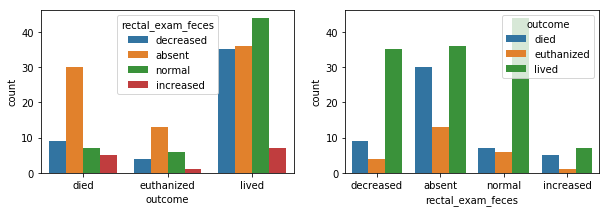

In [28]:
print(df['rectal_exam_feces'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='rectal_exam_feces', data=df)
plt.subplot(1,2,2)
sns.countplot('rectal_exam_feces', hue='outcome', data=df)
plt.show()

abdomen(복부)
  - possible values
    - 1 = normal
    - 2 = other
    - 3 = firm feces in the large intestine
    - 4 = distended small intestine
    - 5 = distended large intestine
  - 3은 아마도 기계적인 충격에 의해 야기된 방해물일 것이다, 그리고 보통 의학적으로 치료된다.
  - 4 및 5는 수술 병변을 나타낸다

count               181
unique                5
top       distend_large
freq                 78
Name: abdomen, dtype: object


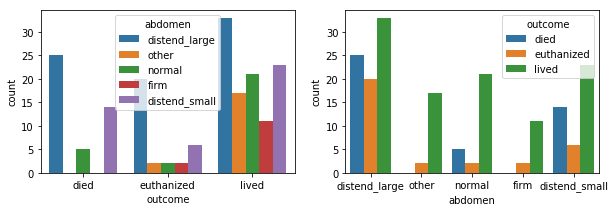

In [29]:
print(df['abdomen'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='abdomen', data=df)
plt.subplot(1,2,2)
sns.countplot('abdomen', hue='outcome', data=df)
plt.show()

In [52]:
df['abdomen'].replace({'normal': 1, 'other': 2, 'firm': 3, 'distend_small': 4, 'distend_large': 5}, inplace=True)

packed cell volume
- linear
- 혈액 속의 적혈구의 수
- 정상 범위는 30 ~ 50입니다. 혈액 순환이 원활 해지거나 동물이 탈수됨에 따라 혈중 농도가 상승합니다.

count    270.000000
mean      46.307407
std       10.436743
min       23.000000
25%       38.000000
50%       45.000000
75%       52.000000
max       75.000000
Name: packed_cell_volume, dtype: float64


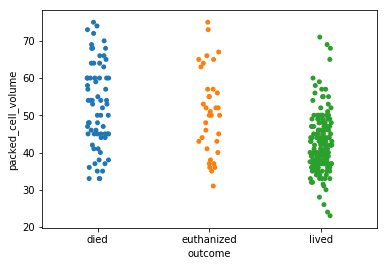

In [30]:
print(df['packed_cell_volume'].describe())
sns.stripplot("outcome", "packed_cell_volume", data=df, jitter=True)
plt.show()

total protein(총 단백질)
  - linear
  - 정상적인 값은 6-7.5 (gms / dL) 범위입니다
  - 값이 높을수록 탈수량이 커집니다.

count    266.000000
mean      24.274436
std       27.364194
min        3.300000
25%        6.500000
50%        7.500000
75%       56.750000
max       89.000000
Name: total_protein, dtype: float64


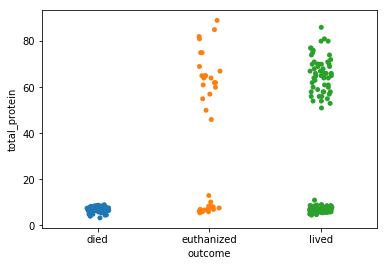

In [31]:
print(df['total_protein'].describe())
sns.stripplot("outcome", "total_protein", data=df, jitter=True)
plt.show()

abdominocentesis appearance(복강경 외관)
  - 말의 복부에 바늘을 넣고 복강으로부터 유체를 얻는다.
  - possible values:
    - 1 = clear
    - 2 = cloudy
    - 3 = serosanguinous
  - normal fluid is clear while cloudy or serosanguinous indicates a compromised gut

count        134
unique         3
top       cloudy
freq          47
Name: abdomo_appearance, dtype: object


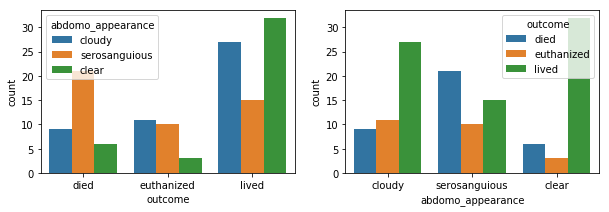

In [32]:
print(df['abdomo_appearance'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='abdomo_appearance', data=df)
plt.subplot(1,2,2)
sns.countplot('abdomo_appearance', hue='outcome', data=df)
plt.show()

In [53]:
df['abdomo_appearance'].replace({'clear': 1, 'cloudy': 2, 'serosanguinous': 3}, inplace=True)

abdomcentesis total protein(복강 내 총 단백질)
  - linear
  - 단백질 수준이 높을수록 손상된 창자가 더 많을 것입니다. 값은 gms / dL 단위입니다.

count    101.000000
mean       3.039604
std        1.967947
min        0.100000
25%        2.000000
50%        2.300000
75%        3.900000
max       10.100000
Name: abdomo_protein, dtype: float64


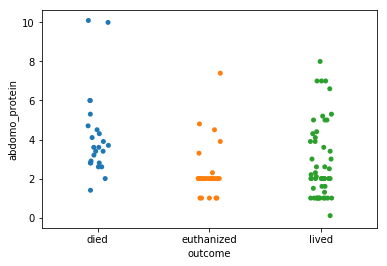

In [33]:
print(df['abdomo_protein'].describe())
sns.stripplot("outcome", "abdomo_protein", data=df, jitter=True)
plt.show()

surgical lesion? (외과 적 병변)
  - retrospectively, was the problem (lesion) surgical?
  - 모든 경우는 수술을 받거나 부검되어 이 값과 병변 유형이 항상 알려집니다.
  - possible values:
    - 1 = Yes
    - 2 = No

count     299
unique      2
top       yes
freq      190
Name: surgical_lesion, dtype: object


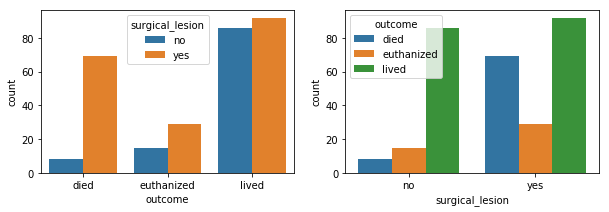

In [34]:
print(df['surgical_lesion'].describe())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot('outcome', hue='surgical_lesion', data=df)
plt.subplot(1,2,2)
sns.countplot('surgical_lesion', hue='outcome', data=df)
plt.show()

In [54]:
df['surgical_lesion'].replace({'yes': 1, 'no': 2}, inplace=True)

25, 26, 27: type of lesion
- 첫 번째 숫자는 병변의 위치입니다.
  - 1 = gastric
  - 2 = sm intestine
  - 3 = lg colon
  - 4 = lg colon and cecum
  - 5 = cecum
  - 6 = transverse colon
  - 7 = retum/descending colon
  - 8 = uterus
  - 9 = bladder
  - 11 = all intestinal sites
  - 00 = none
  
  
- 두 번째 숫자는 유형입니다.
  - 1 = simple
  - 2 = strangulation
  - 3 = inflammation
  - 4 = other
  
  
- 세 번째 숫자는 하위 유형입니다.
  - 1 = mechanical
  - 2 = paralytic
  - 0 = n/a
  
  
- 네 번째 숫자는 특정 코드입니다.
  -  1 = obturation
  -  2 = intrinsic
  -  3 = extrinsic
  -  4 = adynamic
  -  5 = volvulus/torsion
  -  6 = intussuption
  -  7 = thromboembolic
  -  8 = hernia
  -  9 = lipoma/slenic incarceration
  -  10 = displacement
  -  0 = n/a

In [63]:
df['lesion_1'].unique()

array([11300,  2208,     0,  4300,  3124,  3205,  2124,  2111,  4124,
        2112,  3207,  1400,  4205,  3111,  4122,  2207,  2209,  1124,
        7111,  5205,  2113,  9400,  2305,  7209,  7400,  3112,  3209,
        2322, 11124,  3025,  2205,  5206,   400,  5000,  5400, 31110,
        2206,  5124,  7113,  6209,  3400,  6112,  6111,  1111,  2300,
       21110,  4111,  3133,  5111,   300,  3115,  9000,  3300,  3113,
       41110, 11400, 12208,  4206,  4207,  8300,  8400], dtype=int64)

In [64]:
df['lesion_2'].unique()

array([   0, 1400, 7111, 3111, 6112, 3112], dtype=int64)

In [65]:
df['lesion_3'].unique()

array([   0, 2209], dtype=int64)

cp_data
  - is pathology data present for this case?
    - 1 = Yes
    - 2 = No
  - 이러한 변수는 병리학 데이터가 포함되지 않거나 수집되지 않기 때문에 중요하지 않다.

In [58]:
df['cp_data'].replace({'yes': 1, 'no': 2}, inplace=True)

outcome(결과)
  - what eventually happened to the horse?
  - possible values:
    - 1 = lived
    - 2 = died
    - 3 = was euthanized

In [57]:
df['outcome'].replace({'lived': 1, 'died': 2, 'euthanized':3}, inplace=True)

Missing values: 30% of the values are missing

## Feature selection

## Modeling

## Model selection